<a href="https://colab.research.google.com/github/iynnn/Data-Science/blob/main/Gamma%20Fest%202023/Percobaan_Ke_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount = True)

Mounted at /content/drive


In [ ]:
path =  "/content/drive/MyDrive/[02] Lomba/[Current] GAMMAFEST IPB 2023 /Penyisihan"
df_train = pd.read_csv(path + "/train.csv")
df_test = pd.read_csv(path + "/test.csv")

In [ ]:
df_train.isna().sum()

id            0
DC024         0
DC025         0
DC205        11
DC206        21
DC207        44
DC208        13
DC209        18
DC210        41
DC211        24
DC212        24
DC213        77
DC214         9
DC215        14
DC216        39
DC217         0
DC219         0
DC220         4
DC226         6
DC230a       11
DC230b     3009
DC232      3024
DC232b     3024
DC235     10446
DC237        21
DC237a       37
DC237b       37
DC237c       37
DC237d       37
DC237e       37
DC237f       37
DC241       612
DC242      5374
DC244         4
DC246         9
DC252        14
DC270a        0
DC109        11
DC142a       52
DC201         3
dtype: int64

kita akan menge-drop 2 variabel yang NA nya melebihi 10%, karena udah terlalu jauh kalo mau diimputasi

In [ ]:
# train = df_train.drop(columns = ["id", "DC235", "DC242"], axis = 1)
# test = df_test.drop(columns = ["id", "DC235", "DC242"], axis = 1)
train = df_train.drop(columns = ["id"], axis = 1)
test = df_test.drop(columns = ["id"], axis = 1)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35973 entries, 0 to 35972
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DC024   35973 non-null  int64  
 1   DC025   35973 non-null  int64  
 2   DC205   35962 non-null  float64
 3   DC206   35952 non-null  float64
 4   DC207   35929 non-null  float64
 5   DC208   35960 non-null  float64
 6   DC209   35955 non-null  float64
 7   DC210   35932 non-null  float64
 8   DC211   35949 non-null  float64
 9   DC212   35949 non-null  float64
 10  DC213   35896 non-null  float64
 11  DC214   35964 non-null  float64
 12  DC215   35959 non-null  float64
 13  DC216   35934 non-null  float64
 14  DC217   35973 non-null  int64  
 15  DC219   35973 non-null  int64  
 16  DC220   35969 non-null  float64
 17  DC226   35967 non-null  float64
 18  DC230a  35962 non-null  float64
 19  DC230b  32964 non-null  float64
 20  DC232   32949 non-null  float64
 21  DC232b  32949 non-null  float64
 22

Melihat gimana keadaan datanya, apakah sudah konsisten atau belum

In [ ]:
# cek = {}
# # cek = pd.DataFrame(cek)
# for c in train.columns :
#   cek[c] = train[c].value_counts()
#   # print("---- %s ---" %c)
#   # print(train[c].value_counts())

# Cek Konsistensi
seperti yang dijelasin erza kemarin, kalau misal kita mau ngecek konsistensi apakah yang ada di training itu udah semuanya ada di metadata, apakah ada kejanggalan berupa ada nilai kategorik yang tidak ada di metadata

In [ ]:
# Memasukkan inputan data metadata
list_var = pd.read_excel(path + "/Metadata DSC.xlsx", sheet_name = "Sheet1")
list_var.head()

,DC025,DC024,DC205,DC206,DC207,DC208,DC209,DC210,DC211,DC212,...,DC237e,DC237f,DC241,DC242,DC244,DC246,DC252,DC270a,DC109,DC142a
0,1.0,11,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,11.0,998.0
1,2.0,12,11.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,12.0,NaN
2,NaN,13,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.0,8.0,3.0,NaN,NaN,NaN,2.0,3.0,21.0,NaN
3,NaN,14,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6.0,NaN,NaN,NaN,3.0,4.0,31.0,NaN
4,NaN,15,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,5.0,32.0,NaN


In [ ]:
# Memasukkan count value pada setiap variabel ini pada data training
for c in train.columns :
  globals()[f'count_{c}'] = pd.DataFrame(train[c].value_counts())

In [ ]:
def cek(sc1, sc2):
  # list 1 ini nanti isinya yang dari dataframe asli
  # list 2 ini yang dari metadata

  list1 = list(sc1.index)

  list2 = list_var[sc2].values
  list2 = list2[~np.isnan(list2)]
  list2 = list2.tolist()

  c = []
  for number in list1:
    if  number not in list2:
      if number not in c:
        c.append(number)

  if not c:
    print("Tidak ada masalah di variabel ", sc2)
  else:
    print("Terdapat nilai yang tidak ada dalam metadata pada variabel ", sc2,  " yaitu : {}". format(c))
  # print((sc1))


# Mengecek pada masing-masing variabel data training apakah sudah konsisten apa belom
for var in list(list_var.columns):
  sc1 = "count_" + var
  sc1 = globals()[sc1]

  sc2 = var

  cek(sc1, sc2)


Tidak ada masalah di variabel  DC025
Tidak ada masalah di variabel  DC024
Tidak ada masalah di variabel  DC205
Tidak ada masalah di variabel  DC206
Tidak ada masalah di variabel  DC207
Tidak ada masalah di variabel  DC208
Tidak ada masalah di variabel  DC209
Tidak ada masalah di variabel  DC210
Tidak ada masalah di variabel  DC211
Tidak ada masalah di variabel  DC212
Tidak ada masalah di variabel  DC213
Tidak ada masalah di variabel  DC214
Tidak ada masalah di variabel  DC215
Terdapat nilai yang tidak ada dalam metadata pada variabel  DC216  yaitu : [2.0, 3.0, 1.0, 4.0, 5.0, 0.0, 6.0, 7.0, 8.0, 10.0, 9.0, 20.0, 11.0, 12.0, 14.0]
Tidak ada masalah di variabel  DC217
Tidak ada masalah di variabel  DC219
Terdapat nilai yang tidak ada dalam metadata pada variabel  DC220  yaitu : [47.0, 52.0, 42.0, 48.0, 45.0, 44.0, 41.0, 46.0, 37.0, 49.0, 40.0, 43.0, 57.0, 51.0, 54.0, 53.0, 39.0, 38.0, 34.0, 35.0, 36.0, 50.0, 55.0, 60.0, 58.0, 59.0, 56.0, 33.0, 62.0, 32.0, 31.0, 61.0, 63.0, 65.0, 30.0, 64.

::nah, di sini terdapat masalah di variabel DC252, yaitu ada angka 4, harusnya gada , ini perlu dihapus rownya (ya karena kita gatau gimana solusinya atau true value, mungkin ini salah imput atau type)

PANITNYA YG SALAH AHAHAHAH
agak semangat kalo nemu celah gini xixiix :)
jadi, udah konsisten semua ygy

tinggal cek yang di variabel numerik itu

Selanjutnya akan dicek pada masing-masing variabel data testing, apakah udah konsisten apa belom

In [ ]:
for c in test.columns :
  globals()[f'count_{c}_test'] = pd.DataFrame(test[c].value_counts())

In [ ]:
# Mengecek pada masing-masing variabel data training apakah sudah konsisten apa belom
for var in list(list_var.columns):
  sc1 = "count_" + var + "_test"
  sc1 = globals()[sc1]

  sc2 = var

  cek(sc1, sc2)


Tidak ada masalah di variabel  DC025
Tidak ada masalah di variabel  DC024
Tidak ada masalah di variabel  DC205
Tidak ada masalah di variabel  DC206
Tidak ada masalah di variabel  DC207
Tidak ada masalah di variabel  DC208
Tidak ada masalah di variabel  DC209
Tidak ada masalah di variabel  DC210
Tidak ada masalah di variabel  DC211
Tidak ada masalah di variabel  DC212
Tidak ada masalah di variabel  DC213
Tidak ada masalah di variabel  DC214
Tidak ada masalah di variabel  DC215
Terdapat nilai yang tidak ada dalam metadata pada variabel  DC216  yaitu : [2, 3, 1, 4, 5, 6, 0, 7, 8, 9, 22, 18, 10, 21]
Tidak ada masalah di variabel  DC217
Tidak ada masalah di variabel  DC219
Terdapat nilai yang tidak ada dalam metadata pada variabel  DC220  yaitu : [47, 45, 42, 52, 48, 44, 40, 41, 46, 49, 43, 38, 37, 39, 57, 53, 35, 36, 50, 34, 51, 54, 56, 60, 55, 32, 62, 59, 33, 58, 61, 65, 63, 31, 64, 67, 30, 66, 29, 72, 28, 27, 26, 70, 68, 69, 71, 75, 25, 77, 74, 24, 23, 73, 76, 80, 78, 22, 79, 21, 82, 81,

https://www.techbeamers.com/program-python-list-contains-elements/

In [ ]:
train.query(
    'DC220 == 97 or DC220 == 98 or DC142a == 998'
)

,DC024,DC025,DC205,DC206,DC207,DC208,DC209,DC210,DC211,DC212,...,DC237f,DC241,DC242,DC244,DC246,DC252,DC270a,DC109,DC142a,DC201
52,11,1,12.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,2.0,4,11.0,998.0,Layak Minum
145,11,2,17.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,2,21.0,998.0,Layak Minum
182,11,2,12.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,5,11.0,998.0,Layak Minum
318,11,2,12.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,4.0,1,11.0,998.0,Layak Minum
999,11,1,16.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,2.0,3,12.0,998.0,Layak Minum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35198,91,2,17.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,3,21.0,998.0,Layak Minum
35307,91,2,12.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,2,11.0,998.0,Layak Minum
35371,91,2,17.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2.0,NaN,1.0,1.0,4.0,1,21.0,998.0,Layak Minum
35404,91,2,12.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,1.0,1.0,4.0,2,11.0,998.0,Layak Minum


In [ ]:
train.query(
    'DC220 == 98'
)

,DC024,DC025,DC205,DC206,DC207,DC208,DC209,DC210,DC211,DC212,...,DC237f,DC241,DC242,DC244,DC246,DC252,DC270a,DC109,DC142a,DC201
30319,73,1,12.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,3,11.0,90.0,Layak Minum


In [ ]:
train.query(
    'DC142a == 998'
)

,DC024,DC025,DC205,DC206,DC207,DC208,DC209,DC210,DC211,DC212,...,DC237f,DC241,DC242,DC244,DC246,DC252,DC270a,DC109,DC142a,DC201
52,11,1,12.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,2.0,4,11.0,998.0,Layak Minum
145,11,2,17.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,2,21.0,998.0,Layak Minum
182,11,2,12.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,5,11.0,998.0,Layak Minum
318,11,2,12.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,4.0,1,11.0,998.0,Layak Minum
999,11,1,16.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,2.0,3,12.0,998.0,Layak Minum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35198,91,2,17.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,3,21.0,998.0,Layak Minum
35307,91,2,12.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,2,11.0,998.0,Layak Minum
35371,91,2,17.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2.0,NaN,1.0,1.0,4.0,1,21.0,998.0,Layak Minum
35404,91,2,12.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,1.0,1.0,4.0,2,11.0,998.0,Layak Minum


In [ ]:
test.query(
    'DC220 == 97 or DC220 == 98 or DC142a == 998'
)

,DC024,DC025,DC205,DC206,DC207,DC208,DC209,DC210,DC211,DC212,...,DC237e,DC237f,DC241,DC242,DC244,DC246,DC252,DC270a,DC109,DC142a
262,35,2,12,1,1,0,0,0,0,0,...,0,0,1,1,0,0,1,2,11,998
528,16,2,12,1,0,1,1,1,1,0,...,0,0,1,1,0,1,4,4,11,998
619,32,2,12,1,1,1,1,1,1,0,...,0,0,1,1,0,0,1,5,11,998
933,61,1,12,1,0,1,1,0,1,1,...,0,0,1,1,0,0,0,4,11,998
980,36,2,12,1,0,1,0,1,1,0,...,0,0,1,1,0,0,1,4,11,998
1534,32,2,16,1,0,1,0,1,0,0,...,0,1,1,0,1,0,1,3,12,998
2258,73,1,12,1,0,1,1,0,1,0,...,0,0,1,1,0,0,0,5,11,998
2460,73,1,12,1,0,1,1,0,1,1,...,0,0,1,1,1,0,0,5,11,998
2785,75,2,12,1,0,1,1,0,1,0,...,0,0,1,1,0,1,2,5,11,998
2861,61,2,12,1,0,1,0,1,1,0,...,0,0,1,0,1,1,1,3,11,998


Sepertinya gapapa, kalo misal kan ini yang di training yang bagian variabel numerik itu ada yang 998 atau gimana
soalnya di testing juga ada yang segitu banyaknya, kan nanti mengenali

tapi panitianya lagi tu, metadatanya berubah

Lanjut modelling dulu ajaa banggggg

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35973 entries, 0 to 35972
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DC024   35973 non-null  int64  
 1   DC025   35973 non-null  int64  
 2   DC205   35962 non-null  float64
 3   DC206   35952 non-null  float64
 4   DC207   35929 non-null  float64
 5   DC208   35960 non-null  float64
 6   DC209   35955 non-null  float64
 7   DC210   35932 non-null  float64
 8   DC211   35949 non-null  float64
 9   DC212   35949 non-null  float64
 10  DC213   35896 non-null  float64
 11  DC214   35964 non-null  float64
 12  DC215   35959 non-null  float64
 13  DC216   35934 non-null  float64
 14  DC217   35973 non-null  int64  
 15  DC219   35973 non-null  int64  
 16  DC220   35969 non-null  float64
 17  DC226   35967 non-null  float64
 18  DC230a  35962 non-null  float64
 19  DC230b  32964 non-null  float64
 20  DC232   32949 non-null  float64
 21  DC232b  32949 non-null  float64
 22

In [ ]:
# cek duplikat
pd.DataFrame(train.duplicated(keep = 'last')).value_counts()

False    35969
True         4
dtype: int64

ada 4 duplikat sebelum di smote

In [ ]:
train = train.drop_duplicates()
pd.DataFrame(train.duplicated(keep = 'last')).value_counts()

False    35969
dtype: int64

Sudah tidak ada yang duplikat sekarang

In [ ]:
pd.DataFrame(train["DC205"] == train["DC109"]).value_counts()
# ini digunakan untuk ngecek apakah variabel sama sama jenis toilet itu sama semua apa engga, kalo misal sama semua ya bisa dihapus kan kan ya
# oh ternyata beda jenis yang dimaksud di kedua variabel itu kok
# jadi pake aja gapapa


False    33570
True      2399
dtype: int64

In [ ]:
train.isna().sum()

DC024         0
DC025         0
DC205        11
DC206        21
DC207        44
DC208        13
DC209        18
DC210        41
DC211        24
DC212        24
DC213        77
DC214         9
DC215        14
DC216        39
DC217         0
DC219         0
DC220         4
DC226         6
DC230a       11
DC230b     3009
DC232      3024
DC232b     3024
DC235     10444
DC237        21
DC237a       37
DC237b       37
DC237c       37
DC237d       37
DC237e       37
DC237f       37
DC241       610
DC242      5371
DC244         4
DC246         9
DC252        14
DC270a        0
DC109        11
DC142a       52
DC201         3
dtype: int64

terdapat banyak variabel yang memiliki nilai NaN, sehingga yang nilai 10k dan 5k dihapus saja
sisanya bisa kita imputasi dengan random forest

# Imputasi Random Forest

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier


imp_num = IterativeImputer(estimator=RandomForestRegressor(),
                            initial_strategy='mean',
                            max_iter=10, random_state=42)

imp_cat = IterativeImputer(estimator=RandomForestClassifier(),
                            initial_strategy='most_frequent',
                            max_iter=10, random_state=42)


Imputasi variabel numerik dengan menggunakan Random Forest dapat dilakukan dengan menggunakan pendekatan berikut:

Pertama, identifikasi variabel numerik yang perlu diimputasi. Jika ada nilai 998 yang menandakan nilai tidak diketahui, anggaplah nilai ini sebagai nilai yang hilang atau tidak valid.

Pisahkan data menjadi dua kelompok: satu kelompok dengan nilai 998 pada variabel yang perlu diimputasi dan satu kelompok tanpa nilai 998. Misalnya, kita sebut kelompok dengan nilai 998 sebagai "kelompok nilai hilang" dan kelompok tanpa nilai 998 sebagai "kelompok nilai diketahui".

Di dalam kelompok nilai diketahui, gunakan nilai-nilai yang ada sebagai variabel input dan nilai yang diketahui sebagai variabel target dalam model Random Forest. Latih model Random Forest pada kelompok ini.

Setelah model Random Forest dilatih, gunakan model ini untuk memprediksi nilai-nilai dalam kelompok nilai hilang. Gunakan nilai-nilai yang ada sebagai variabel input dalam prediksi.

Setelah melakukan prediksi, gunakan hasil prediksi sebagai imputasi untuk nilai-nilai 998 dalam kelompok nilai hilang.

Jika terdapat variabel lain yang memiliki nilai 998 dan perlu diimputasi, ulangi langkah-langkah di atas untuk variabel tersebut.

In [ ]:
# Pisahkan dataset yang punya nilai other pada variabel numerik
cat = list(train.drop(columns = ["DC216", "DC220", "DC142a", 'DC235', "DC242"], axis = 1))
num = list(train[["DC216", "DC220", "DC142a"]])

In [ ]:
train[num].describe()

,DC216,DC220,DC142a
count,35930.000000,35965.000000,35917.000000
mean,2.323852,48.477965,82.674360
std,1.105245,13.711769,91.197377
min,0.000000,13.000000,0.000000
25%,2.000000,38.000000,42.000000
50%,2.000000,48.000000,63.000000
75%,3.000000,58.000000,96.000000
max,20.000000,98.000000,998.000000


ini kok variabel DC142a ada nilai 0 nya? apakah tidak ada lantainya???
sepertinya ini error kaya yang ada di 998 itu

In [ ]:
train_1 = train
# train_1.query('DC142a == 0 or DC142a == 998'), numpy.NaN)
train_1 = train_1.replace({'DC142a' : {998 : np.NaN, 0 : np.NaN}, 'DC216' : {0 : np.NaN}, 'DC220' : {98 : np.NaN}})
# train_1.query('DC142a == 998')
train_1 = train_1.drop(columns = ['DC235', "DC242"], axis = 1)
train_1.isna().sum()

# ini menambah nilai NA yang ada pada variabel DC142a

DC024        0
DC025        0
DC205       11
DC206       21
DC207       44
DC208       13
DC209       18
DC210       41
DC211       24
DC212       24
DC213       77
DC214        9
DC215       14
DC216      285
DC217        0
DC219        0
DC220        5
DC226        6
DC230a      11
DC230b    3009
DC232     3024
DC232b    3024
DC237       21
DC237a      37
DC237b      37
DC237c      37
DC237d      37
DC237e      37
DC237f      37
DC241      610
DC244        4
DC246        9
DC252       14
DC270a       0
DC109       11
DC142a     268
DC201        3
dtype: int64

Apakah variabel DC216 itu yang 0 juga termasuk nilai aneh? kenapa aneh? karena ya otomatis, kan jumlah ruang tidur yang ada di sono itu kan minimal 1 kan ya
oh iya, bisa dicek numerik atau float juga, siapa tau ada yang float kan aneh

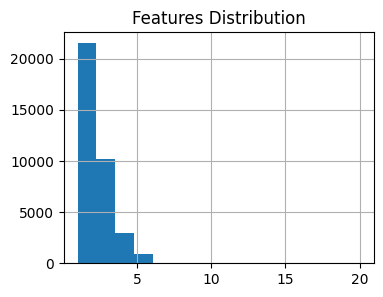

In [ ]:
train_1["DC216"].hist(figsize=(4,3),bins = 15)
plt.title("Features Distribution")
plt.show()

In [ ]:
train_1["DC216"].value_counts()
# oke, aman gada yang nilainya koma komaan, karena itu harus nilainya diskrit
# dan gada yang nilainya 97 atau 98 yang merupakan tidak diketahui atau tidak dapat diukur
# cmiiw
# udah di atas ya, bareng sama DC142a

2.0     13666
3.0     10175
1.0      7841
4.0      2914
5.0       734
6.0       214
7.0        72
8.0        30
10.0       17
9.0         8
20.0        6
11.0        4
12.0        2
14.0        1
Name: DC216, dtype: int64

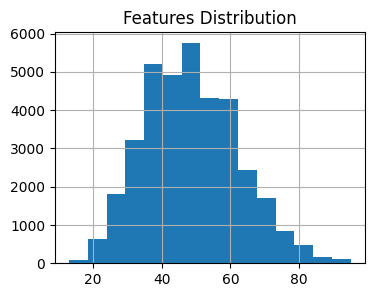

In [ ]:
# pd.DataFrame(train_1["DC220"].value_counts()).sort_index()
train_1["DC220"].hist(figsize=(4,3),bins = 15)
plt.title("Features Distribution")
plt.show()

## Imputasi yang numerik dimulai

In [ ]:
train_imp = train_1
train_imp[num] = imp_num.fit_transform(train_1[num])

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [ ]:
train_imp[num].describe()

,DC216,DC220,DC142a
count,35969.000000,35969.000000,35969.000000
mean,2.335049,48.476673,77.360821
std,1.090545,13.708538,58.461054
min,1.000000,13.000000,1.000000
25%,2.000000,38.000000,42.000000
50%,2.000000,48.000000,63.000000
75%,3.000000,58.000000,96.000000
max,20.000000,95.000000,995.000000


In [ ]:
train_imp["DC216"].value_counts()

2.000000    13666
3.000000    10175
1.000000     7876
4.000000     2914
5.000000      734
            ...  
2.644179        1
1.918167        1
1.883529        1
2.308117        1
1.448643        1
Name: DC216, Length: 235, dtype: int64

ini aku bingung, pas abis numeric itu kan yang banyaknya ruang tidur itu, abis imputasi hasilnya ada yang koma, nah itu gimana, apakah dia masuk ke kategori atau numwerik

## Imputasi yang kategorik dulu dah yak

In [ ]:
# karena gada anomali (insyaallah), mari kita langsung bagi aja yang kategorik itu ke dalam beberapa segmen
cat1 = cat[:9]
cat2 = cat[9:18]
cat3 = cat[18:27]
cat4 = cat[27:]

In [ ]:
train_1["DC201"] = train_1["DC201"].map({"Layak Minum" : 1, "Tidak Layak Minum" : 0})

In [ ]:
train_imp[cat1] = imp_cat.fit_transform(train_1[cat1])

In [ ]:
train_imp[cat2] = imp_cat.fit_transform(train_1[cat2])

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [ ]:
train_imp[cat3] = imp_cat.fit_transform(train_1[cat3])

In [ ]:
train_imp[cat4] = imp_cat.fit_transform(train_1[cat4])

In [ ]:
train_imp.isna().sum()

DC024     0
DC025     0
DC205     0
DC206     0
DC207     0
DC208     0
DC209     0
DC210     0
DC211     0
DC212     0
DC213     0
DC214     0
DC215     0
DC216     0
DC217     0
DC219     0
DC220     0
DC226     0
DC230a    0
DC230b    0
DC232     0
DC232b    0
DC237     0
DC237a    0
DC237b    0
DC237c    0
DC237d    0
DC237e    0
DC237f    0
DC241     0
DC244     0
DC246     0
DC252     0
DC270a    0
DC109     0
DC142a    0
DC201     0
dtype: int64

In [ ]:
# Memasukkan count value pada setiap variabel ini pada data training
for c in train_imp.columns :
  globals()[f'count_imp_{c}'] = pd.DataFrame(train_imp[c].value_counts())


list_var_2 = list_var.drop(columns = ["DC235", "DC242"])
# Mengecek pada masing-masing variabel data training apakah sudah konsisten apa belom
for var in list(list_var_2.columns):
  sc1 = "count_imp_" + var
  sc1 = globals()[sc1]

  sc2 = var

  cek(sc1, sc2)

Tidak ada masalah di variabel  DC025
Tidak ada masalah di variabel  DC024
Tidak ada masalah di variabel  DC205
Tidak ada masalah di variabel  DC206
Tidak ada masalah di variabel  DC207
Tidak ada masalah di variabel  DC208
Tidak ada masalah di variabel  DC209
Tidak ada masalah di variabel  DC210
Tidak ada masalah di variabel  DC211
Tidak ada masalah di variabel  DC212
Tidak ada masalah di variabel  DC213
Tidak ada masalah di variabel  DC214
Tidak ada masalah di variabel  DC215
Terdapat nilai yang tidak ada dalam metadata pada variabel  DC216  yaitu : [2.0, 3.0, 1.0, 4.0, 5.0, 6.0, 7.0, 8.0, 10.0, 9.0, 20.0, 11.0, 1.4366470997183065, 1.453945917560069, 1.73273654610513, 1.2641901986901989, 1.576169401547884, 1.3448706081500204, 1.1196666666666666, 1.585177050844839, 2.148233069240237, 1.7286602142267768, 2.8348700784509613, 1.5449351219216712, 1.9667555263364092, 1.8880768138574375, 2.5088237827514663, 2.3655862074984473, 1.0754804427000888, 12.0, 2.1823776742019745, 1.546450154678483, 1

ga ada masalah yang berarti pada variabel yang diimputasi itu apakah dia punya nilai yang ga konsisten apa engga

In [ ]:
train_batch = train_1
tiga = math.floor(len(train_1)/3)
train_b1 = train_batch.iloc[:tiga,]
train_b2 = train_batch.iloc[tiga:2*tiga,]
train_b3 = train_batch.iloc[2*tiga:,]

In [ ]:
train_b1[cat] = imp_cat.fit_transform(train_b1[cat])
train_b2[cat] = imp_cat.fit_transform(train_b2[cat])
train_b3[cat] = imp_cat.fit_transform(train_b3[cat])

<ipython-input-43-e20fd3978bd4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_b1[cat] = imp_cat.fit_transform(train_b1[cat])
<ipython-input-43-e20fd3978bd4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_b2[cat] = imp_cat.fit_transform(train_b2[cat])
<ipython-input-43-e20fd3978bd4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [ ]:
train_b1.isna().sum()

DC024     0
DC025     0
DC205     0
DC206     0
DC207     0
DC208     0
DC209     0
DC210     0
DC211     0
DC212     0
DC213     0
DC214     0
DC215     0
DC216     0
DC217     0
DC219     0
DC220     0
DC226     0
DC230a    0
DC230b    0
DC232     0
DC232b    0
DC237     0
DC237a    0
DC237b    0
DC237c    0
DC237d    0
DC237e    0
DC237f    0
DC241     0
DC244     0
DC246     0
DC252     0
DC270a    0
DC109     0
DC142a    0
DC201     0
dtype: int64

In [ ]:
train_b2.isna().sum()

DC024     0
DC025     0
DC205     0
DC206     0
DC207     0
DC208     0
DC209     0
DC210     0
DC211     0
DC212     0
DC213     0
DC214     0
DC215     0
DC216     0
DC217     0
DC219     0
DC220     0
DC226     0
DC230a    0
DC230b    0
DC232     0
DC232b    0
DC237     0
DC237a    0
DC237b    0
DC237c    0
DC237d    0
DC237e    0
DC237f    0
DC241     0
DC244     0
DC246     0
DC252     0
DC270a    0
DC109     0
DC142a    0
DC201     0
dtype: int64

In [ ]:
train_b3.isna().sum()

DC024     0
DC025     0
DC205     0
DC206     0
DC207     0
DC208     0
DC209     0
DC210     0
DC211     0
DC212     0
DC213     0
DC214     0
DC215     0
DC216     0
DC217     0
DC219     0
DC220     0
DC226     0
DC230a    0
DC230b    0
DC232     0
DC232b    0
DC237     0
DC237a    0
DC237b    0
DC237c    0
DC237d    0
DC237e    0
DC237f    0
DC241     0
DC244     0
DC246     0
DC252     0
DC270a    0
DC109     0
DC142a    0
DC201     0
dtype: int64

In [ ]:
train_imputasi = pd.concat([train_b1, train_b2,train_b3])

In [ ]:
# train_imputasi.to_csv(path + '/imputasi.csv', index = False)

# Imbalance Handling



In [ ]:
X = train_imputasi.drop("DC201", axis = 1)
Y = train_imputasi.DC201

In [ ]:
print("Jumlah observasi dari data training :", len(X), "| dengan sejumlah" , len(X.columns), "variabel")

Jumlah observasi dari data training : 35969 | dengan sejumlah 36 variabel


In [ ]:
Y.value_counts()

1.0    32397
0.0     3572
Name: DC201, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X_train_res, y_train_res = sm.fit_resample(X, Y.ravel())

In [ ]:
print("Jumlah observasi dari data training :", len(X_train_res), "| dengan sejumlah" , len(X_train_res.columns), "variabel")

Jumlah observasi dari data training : 64794 | dengan sejumlah 36 variabel


In [ ]:
y_train_res = pd.DataFrame(y_train_res)
y_train_res.value_counts()

0.0    32397
1.0    32397
dtype: int64

## Split data

In [ ]:
from sklearn.model_selection import train_test_split

# split into 80:20 ration
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size = 0.2, random_state = 42)

In [ ]:
print("Jumlah training : ", len(X_train), "| jumlah validator : ", len(X_test))

Jumlah training :  51835 | jumlah validator :  12959


In [ ]:
y_train.value_counts()

1.0    25945
0.0    25890
dtype: int64

# Modelling dengan Xgboost

[Link sumber](https:///towardsdatascience.com/beginners-guide-to-xgboost-for-classification-problems-50f75aac5390)



we will try to improve the model even further by using GridSearchCV offered by Scikit-learn




In [ ]:
import xgboost as xgb

xgb_cl = xgb.XGBClassifier()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# Init classifier
xgb_clf = xgb.XGBClassifier()

# Fit
xgb_clf.fit(X_train, y_train)

# Predict
preds = xgb_clf.predict(X_test)

accuracy_score(y_test, preds)

0.9526969673585924

In [ ]:
f1_score(y_test, preds)

0.9537672524323101

In [ ]:
xgb_cl

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95      6507
         1.0       0.93      0.98      0.95      6452

    accuracy                           0.95     12959
   macro avg       0.95      0.95      0.95     12959
weighted avg       0.95      0.95      0.95     12959



In [ ]:
print(confusion_matrix(y_test, preds))

[[6023  484]
 [ 129 6323]]


## Tuning Parameter using GridSearchCV

In [ ]:
param_grid = {
    "max_depth": [3, 4, 5],
    "learning_rate": [0.1, 0.01, 0.01],
    "gamma": [0, 0.25,  1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

In [ ]:
from sklearn.model_selection import GridSearchCV

# Init classifier
xgb_cl = xgb.XGBClassifier(objective="binary:logistic")

# Init Grid Search
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

# Fit
xgb_new = grid_cv.fit(X_train, y_train)

In [ ]:
xgb_new.best_params_

{'colsample_bytree': 0.5,
 'gamma': 1,
 'learning_rate': 0.1,
 'max_depth': 5,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 0.8}

Best Param :
{'colsample_bytree': 0.5,
 'gamma': 1,
 'learning_rate': 0.1,
 'max_depth': 5,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 0.8}

In [ ]:
xgb_new.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

XGBClassifier
```
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

```




In [ ]:
# Predict
xgb_preds = xgb_new.predict(X_test)

accuracy_score(y_test, xgb_preds)

0.9513079712940813

In [ ]:
f1_score(y_test, xgb_preds)

0.9524455497776773

In [ ]:
print(classification_report(y_test, xgb_preds))

              precision    recall  f1-score   support

         0.0       0.98      0.92      0.95      6507
         1.0       0.93      0.98      0.95      6452

    accuracy                           0.95     12959
   macro avg       0.95      0.95      0.95     12959
weighted avg       0.95      0.95      0.95     12959



```
            precision    recall  f1-score   support

         0.0       0.98      0.92      0.95      6507
         1.0       0.93      0.98      0.95      6452

    accuracy                           0.95     12959
   macro avg       0.95      0.95      0.95     12959
weighted avg       0.95      0.95      0.95     12959
```

In [ ]:
print(confusion_matrix(y_test, xgb_preds))

[[6009  498]
 [ 133 6319]]


# Predict

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11990 entries, 0 to 11989
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   DC024   11990 non-null  int64
 1   DC025   11990 non-null  int64
 2   DC205   11990 non-null  int64
 3   DC206   11990 non-null  int64
 4   DC207   11990 non-null  int64
 5   DC208   11990 non-null  int64
 6   DC209   11990 non-null  int64
 7   DC210   11990 non-null  int64
 8   DC211   11990 non-null  int64
 9   DC212   11990 non-null  int64
 10  DC213   11990 non-null  int64
 11  DC214   11990 non-null  int64
 12  DC215   11990 non-null  int64
 13  DC216   11990 non-null  int64
 14  DC217   11990 non-null  int64
 15  DC219   11990 non-null  int64
 16  DC220   11990 non-null  int64
 17  DC226   11990 non-null  int64
 18  DC230a  11990 non-null  int64
 19  DC230b  11990 non-null  int64
 20  DC232   11990 non-null  int64
 21  DC232b  11990 non-null  int64
 22  DC235   11990 non-null  int64
 23  DC237   119

In [ ]:
test_1 = test.drop(columns = ["DC235", "DC242"], axis = 1)
test_1.head()

,DC024,DC025,DC205,DC206,DC207,DC208,DC209,DC210,DC211,DC212,...,DC237d,DC237e,DC237f,DC241,DC244,DC246,DC252,DC270a,DC109,DC142a
0,35,2,17,1,0,1,0,1,1,0,...,0,0,0,1,1,1,1,3,21,52
1,35,1,12,1,1,1,1,0,1,0,...,0,0,0,1,0,0,1,2,11,18
2,74,2,12,1,0,1,1,1,1,0,...,0,0,0,1,0,1,4,5,11,78
3,72,1,12,1,1,0,0,0,0,1,...,0,0,0,1,1,0,0,1,11,20
4,76,2,12,1,0,1,0,0,1,0,...,0,0,0,1,1,1,1,3,11,125


In [ ]:
# cek variabel yang numerik, kayanya yang masih ada kesalahan itu yang numerik yang nilai 98 dan 998
test_1[num].describe()

,DC216,DC220,DC142a
count,11990.000000,11990.000000,11990.000000
mean,2.340784,48.422852,83.574145
std,1.075030,13.283872,85.810562
min,0.000000,13.000000,0.000000
25%,2.000000,39.000000,48.000000
50%,2.000000,47.000000,66.000000
75%,3.000000,57.000000,96.000000
max,22.000000,95.000000,998.000000


In [ ]:
test_1 = test_1.replace({'DC142a' : {998 : np.NaN, 0 : np.NaN}, 'DC216' : {0 : np.NaN}, 'DC220' : {98 : np.NaN}})
test_1.isna().sum()

DC024      0
DC025      0
DC205      0
DC206      0
DC207      0
DC208      0
DC209      0
DC210      0
DC211      0
DC212      0
DC213      0
DC214      0
DC215      0
DC216     61
DC217      0
DC219      0
DC220      0
DC226      0
DC230a     0
DC230b     0
DC232      0
DC232b     0
DC237      0
DC237a     0
DC237b     0
DC237c     0
DC237d     0
DC237e     0
DC237f     0
DC241      0
DC244      0
DC246      0
DC252      0
DC270a     0
DC109      0
DC142a    60
dtype: int64

In [ ]:
# imputasi dengan random forest
test_1[num] = imp_num.fit_transform(test_1[num])

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [ ]:
test_1.isna().sum()

DC024     0
DC025     0
DC205     0
DC206     0
DC207     0
DC208     0
DC209     0
DC210     0
DC211     0
DC212     0
DC213     0
DC214     0
DC215     0
DC216     0
DC217     0
DC219     0
DC220     0
DC226     0
DC230a    0
DC230b    0
DC232     0
DC232b    0
DC237     0
DC237a    0
DC237b    0
DC237c    0
DC237d    0
DC237e    0
DC237f    0
DC241     0
DC244     0
DC246     0
DC252     0
DC270a    0
DC109     0
DC142a    0
dtype: int64

In [ ]:
prediksi_final = pd.DataFrame(xgb_new.predict(test_1))


In [ ]:
prediksi_final.value_counts()

1    11497
0      493
dtype: int64

In [ ]:
prediksi_xgb_aja = pd.DataFrame(xgb_clf.predict(test_1))
prediksi_xgb_aja.value_counts()

1    11420
0      570
dtype: int64

In [ ]:
prediksi_final["id"] = df_test["id"]
prediksi_final["DC201"] = prediksi_final[0].map({1 : "Layak Minum", 0: "Tidak Layak Minum"})
prediksi_final

,0,id,DC201
0,1,26718,Layak Minum
1,1,26802,Layak Minum
2,1,41302,Layak Minum
3,1,38698,Layak Minum
4,1,44257,Layak Minum
...,...,...,...
11985,1,36943,Layak Minum
11986,1,33415,Layak Minum
11987,1,41998,Layak Minum
11988,1,41567,Layak Minum


In [ ]:
prediksi_final["DC201"].value_counts()

Layak Minum          11497
Tidak Layak Minum      493
Name: DC201, dtype: int64

In [ ]:
prediksi_final = prediksi_final[["id", "DC201"]]
prediksi_final.to_csv(path + "/prediksi xgboost biasa.csv", index = False)

In [ ]:
prediksi_xgb_aja["id"] = df_test["id"]
prediksi_xgb_aja["DC201"] = prediksi_xgb_aja[0].map({1 : "Layak Minum", 0: "Tidak Layak Minum"})
prediksi_xgb_aja

,0,id,DC201
0,1,26718,Layak Minum
1,1,26802,Layak Minum
2,1,41302,Layak Minum
3,1,38698,Layak Minum
4,1,44257,Layak Minum
...,...,...,...
11985,1,36943,Layak Minum
11986,1,33415,Layak Minum
11987,1,41998,Layak Minum
11988,1,41567,Layak Minum


In [ ]:
prediksi_xgb_aja = prediksi_xgb_aja[["id", "DC201"]]
prediksi_xgb_aja.to_csv(path + "/prediksi xgboost aja.csv", index = False)

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
scores = cross_validate(xgb_clf, X_train_res, y_train_res, cv=5,
scoring=('accuracy', 'f1'), return_train_score=True)
predictions = cross_val_predict(xgb_clf, X_train_res, y_train_res,
cv=5)

skor = pd.DataFrame(scores)
skor

,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1
0,16.500581,0.050605,0.456825,1.000000,0.360614,1.000000
1,16.949484,0.050835,0.672891,0.964483,0.513932,0.965371
2,16.514252,0.052550,0.773979,0.962130,0.708005,0.963147
3,16.452222,0.051145,0.578980,0.970792,0.272921,0.971429
4,16.432947,0.050552,0.544220,0.970831,0.162507,0.971449


In [ ]:
scores = cross_validate(xgb_new, X_train_res, y_train_res, cv=5,
scoring=('accuracy', 'f1'), return_train_score=True)
predictions = cross_val_predict(xgb_new, X_train_res, y_train_res,
cv=5)

skor = pd.DataFrame(scores)
skor

KeyboardInterrupt: ignored